In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
plt.rcParams["figure.figsize"] = 12, 8

In [44]:
rectangles = []
for i in range(1, 9):
    for j in range(1, 6):
        for k in range(i, 10):
            for l in range(j, 7):
                if l == j        : continue
                if i == k        : continue
#                if l - j == k - i: continue
                rectangles.append((i, j, k, l))

In [45]:
rectangles[0]

(1, 1, 2, 2)

In [46]:
def draw_rectangle(i, j, k, l):
    x = np.repeat(np.arange(9) + 1, 6)
    y = np.tile  (np.arange(6) + 1, 9)
    plt.scatter(x, y, s=30, c="k")
    plt.plot([i, k], [j, j], "m-")
    plt.plot([i, k], [l, l], "m-")
    plt.plot([i, i], [j, l], "m-")
    plt.plot([k, k], [j, l], "m-")
    plt.grid()
    plt.show()

In [47]:
n = 0
for i, j, k, l in rectangles:
    if (i == j == 4 or 
        k == l == 4 or
        i == l == 4 or
        j == k == 4   ):
#        draw_rectangle(i, j, k, l)
        n += 1

print(n, len(rectangles))

40 540


In [48]:
v = np.linspace(0, 10, 101)
for a in v:
    for b in v:
        for c in v:
            x = - a + b + c
            y = + a - b + c
            z = + a + b - c
            s = + a + b + c
            o = x*y*z - 16*s
            if not o:
                print(a, b, c, s, o)

0.0 0.0 0.0 0.0 0.0
6.0 7.8 7.8 21.6 0.0
6.0 8.0 10.0 24.0 0.0
6.0 10.0 8.0 24.0 0.0
6.1 8.7 7.4 22.2 0.0
6.5 7.0 7.5 21.0 0.0
6.5 7.5 7.0 21.0 0.0
7.0 6.5 7.5 21.0 0.0
7.0 7.5 6.5 21.0 0.0
7.4 8.7 6.1 22.2 0.0
7.5 6.5 7.0 21.0 0.0
7.5 7.0 6.5 21.0 0.0
7.8 6.0 7.8 21.6 0.0
7.8 7.8 6.0 21.6 0.0
8.0 6.0 10.0 24.0 0.0
8.0 10.0 6.0 24.0 0.0
8.7 6.1 7.4 22.2 0.0
8.7 7.4 6.1 22.2 0.0
10.0 6.0 8.0 24.0 0.0
10.0 8.0 6.0 24.0 0.0


In [91]:
sums = [0]
def update_sums(n):
    global sums
    for k in range(len(sums), n + 1):
        sums.append(sums[-1] + 1/k)
    
@np.vectorize
def f(x):
    n = int(np.ceil(x))
    if n > len(sums):
        update_sums(n)
    return np.exp(sums[n])

In [97]:
update_sums(int(1e8))

1.781072409082443

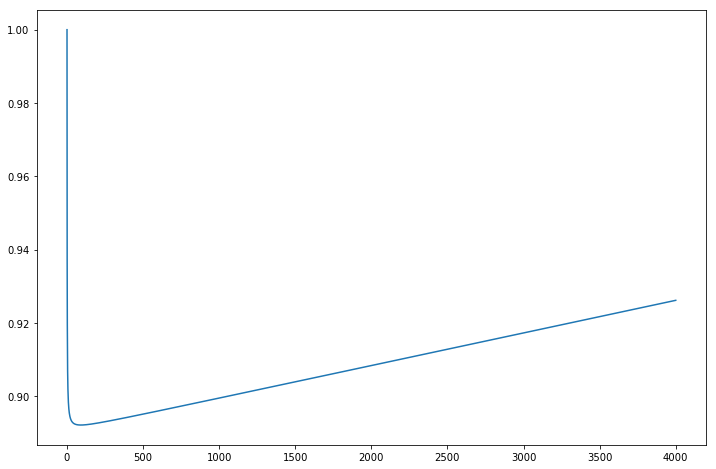

In [85]:
x = np.arange(0, 4001)
y = f(x)
#plt.plot(x, y)
plt.plot(x, y - 1.7810635126355383*x)

In [90]:
x = np.arange(int(2e5))
y = f(x) / (x + 1)
y[-1]

1.7810679653110177

In [68]:
f(0.1), f(1.1), f(2.1)

(array(1.0), array(2.718281828459045), array(4.4816890703380645))

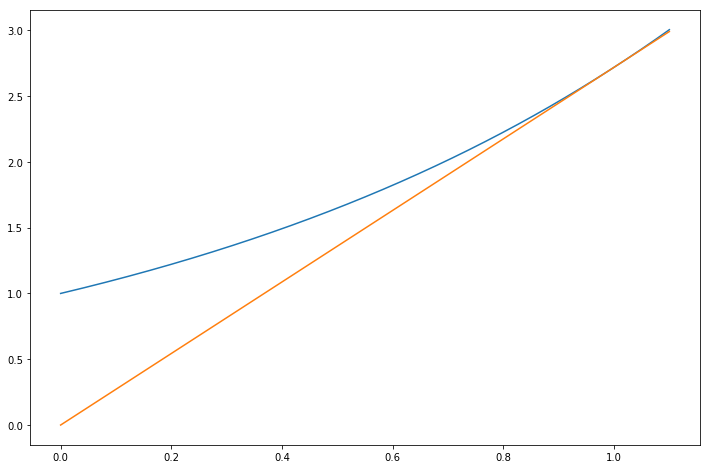

In [102]:
x = np.linspace(0, 1.1, int(1e6) + 1)
y = np.exp(x)
plt.plot(x, y)
plt.plot(x, x*np.exp(1))

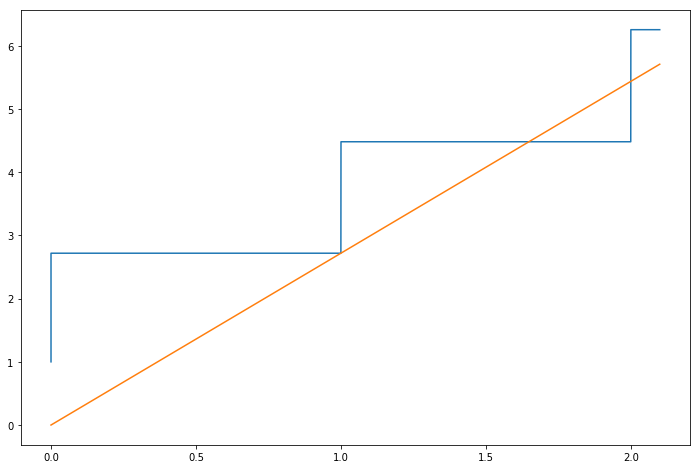

In [105]:
x = np.linspace(0, 2.1, int(1e6) + 1)
y = f(x)
plt.plot(x, y)
plt.plot(x, x*np.exp(1))

/Applications/anaconda3/envs/IC3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


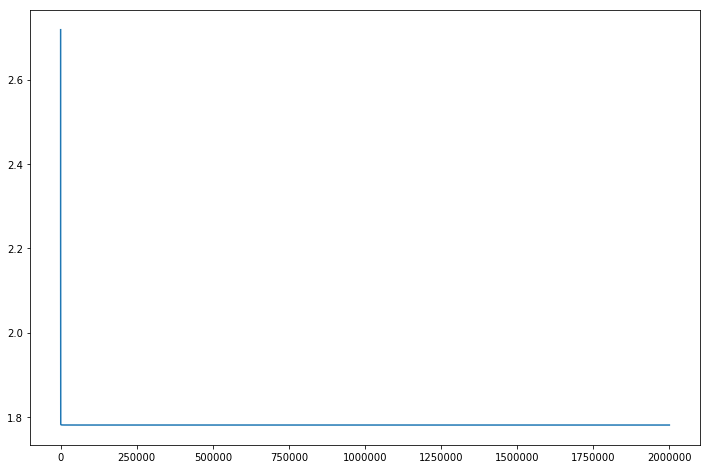

In [112]:
x = np.arange(2000000)
y = f(x) / x
plt.plot(x, y)

In [113]:
y[-1]

1.7810728632573234

In [4]:
def dice_roll():
    o = np.random.randint(1, 7, size=3)
    s = sum(o)
    while True:
        if   o[0] == o[1] == o[2]:
            r = np.random.randint(1, 7, size=3)
            o = r
        elif o[0] == o[1] != o[2]:
            r = np.random.randint(1, 7, size=2)
            o = np.array([*r, o[2]])
        elif o[0] != o[1] == o[2]:
            r = np.random.randint(1, 7, size=2)
            o = np.array([o[0], *r])
        elif o[0] == o[2] != o[1]:
            r = np.random.randint(1, 7, size=2)
            o = np.array([r[0], o[1], r[1]])
        elif o[0] != o[1] != o[2]:
            break
        s += sum(r)
    return s

In [6]:
drs += [dice_roll() for _ in range(int(5e6))]

16.271940900000001

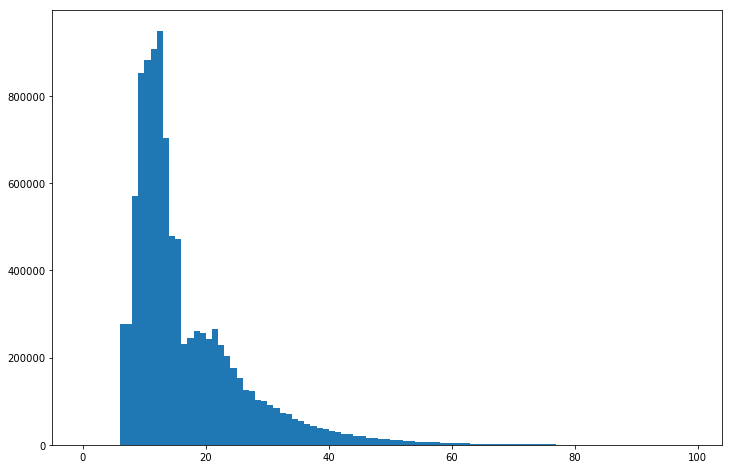

In [7]:
plt.hist(drs, np.arange(100))
np.mean(drs)

In [10]:
drs=np.array(drs, copy=False)

array([ 15.0180143 ,  16.27455776,   0.09772838])

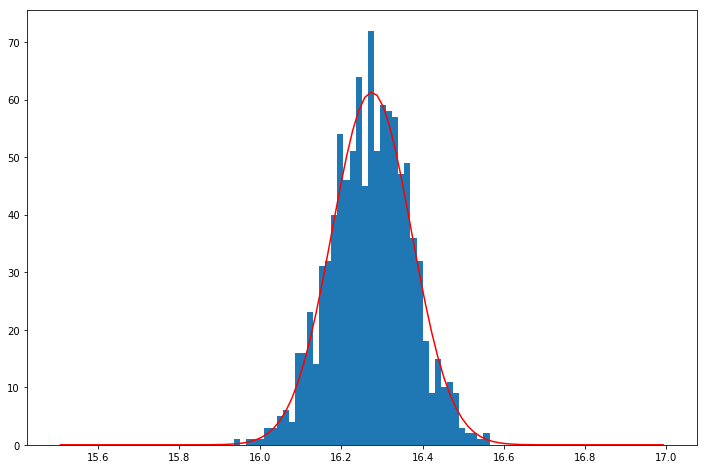

In [16]:
y, x, _ = plt.hist(drs.reshape(1000, 10000).mean(axis=1), np.linspace(15.5, 17, 101))
x = x[:-1] + np.diff(x) / 2

from invisible_cities.core.fit_functions import fit, gauss

f = fit(gauss, x, y, (1, 16, 1))
plt.plot(x, f.fn(x), "r-")
f.values

In [134]:
means = drs.reshap
for i in range(1000):
    means.append(np.mean(drs[i*int(1e4): (i+1)*int(1e4)]))
plt.hist(means)

KeyboardInterrupt: 

In [ ]:
1627455776/1e8

In [17]:
813727888/5e7

813727888.0

In [18]:
162745578/1e7

162745578.0

In [ ]:
81372789/5e6

In [21]:
16274558/1e6

16.274558

In [22]:
8137279/5e5

8137279.0

In [23]:
1627456/1e5

1627456.0

In [24]:
813728/5e4

813728.0

In [26]:
32549/2e3

32549.0

In [27]:
16275/1e3

16275.0

In [29]:
3255/200

16.275

In [31]:
651/40

16.275

# n-dimensional hypercube

In [41]:
for d in range(2, 20):
    samples = np.random.uniform(-.5, .5, size=(d-1, int(1e7)))
    print(d, np.mean(((samples**2).sum(axis=0) + 1/4)**0.5))

2 0.573908489769
3 0.640394758289
4 0.701170607829
5 0.757465856578
6 0.80996267717
7 0.859444298569
8 0.906296876112
9 0.950913416854
10 0.993674346156
11 1.03457634739
12 1.07390500684


KeyboardInterrupt: 

# Generalized Fibo

In [43]:
from functools import lru_cache

@lru_cache(maxsize=None)
def fibo(n, m):
    return 0 if n < m else 1 if n == m else sum(fibo(n - i, m) for i in range(1, m + 1))

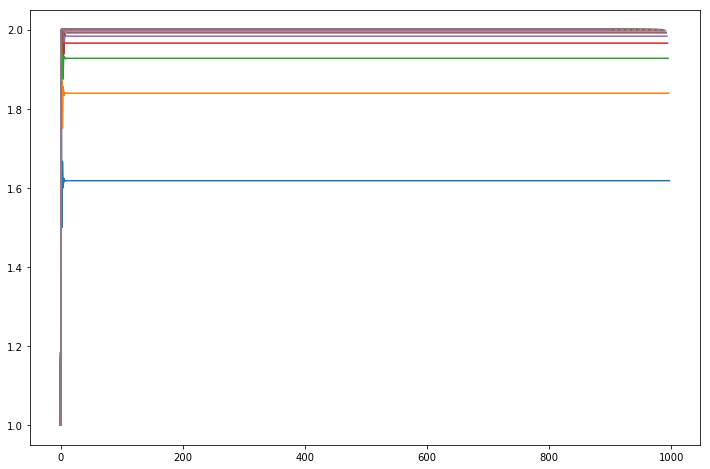

In [48]:
for m in range(2, 100):
    ratios = [fibo(k+1, m)/fibo(k, m) for k in range(m, 1000)]
    plt.plot(ratios)